<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [23]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Generate the following and explain your findings:

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


For the "Median value of owner-occupied homes" provide a boxplot



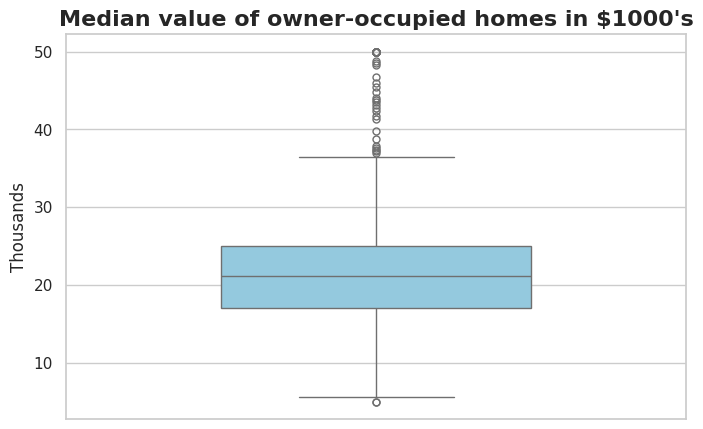

In [11]:
# Example DataFrame

# Set a theme for aesthetics
sns.set_theme(style="whitegrid")

# Create the boxplot
pyplot.figure(figsize=(8, 5))
sns.boxplot(y=boston_df['MEDV'], color="skyblue", width=0.5, fliersize=5)

# Customize the plot
pyplot.title("Median value of owner-occupied homes in $1000's", fontsize=16, weight='bold')
pyplot.ylabel("Thousands", fontsize=12)
pyplot.xticks([])
pyplot.show()


Provide a  bar plot for the Charles river variable

<ipython-input-14-86f5714d39b4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


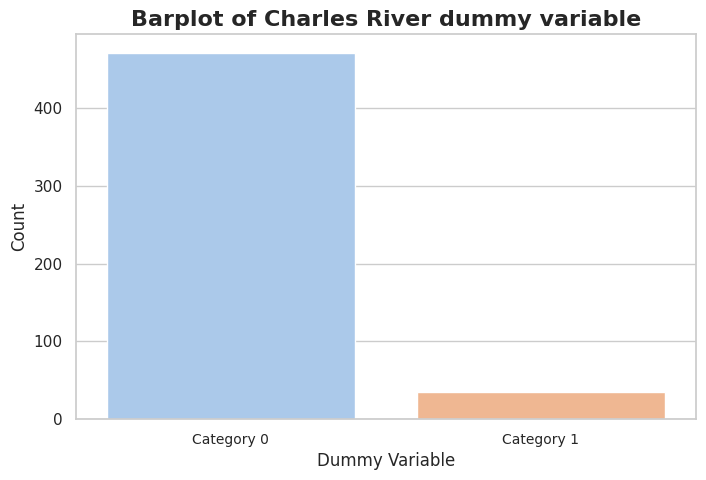

In [14]:
# Count the occurrences of each category in the dummy variable
pyplot.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

# Create a barplot
sns.barplot(
    x=boston_df['CHAS'].value_counts().index,  # Categories: 0 and 1
    y=boston_df['CHAS'].value_counts().values,  # Count of occurrences
    palette="pastel"
)

# Customize the plot
pyplot.title("Barplot of Charles River dummy variable", fontsize=16, weight='bold')
pyplot.xlabel("Dummy Variable", fontsize=12)
pyplot.ylabel("Count", fontsize=12)
pyplot.xticks([0, 1], labels=["Category 0", "Category 1"], fontsize=10)
pyplot.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



<ipython-input-15-a7b6fee035b7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette="pastel", width=0.6)


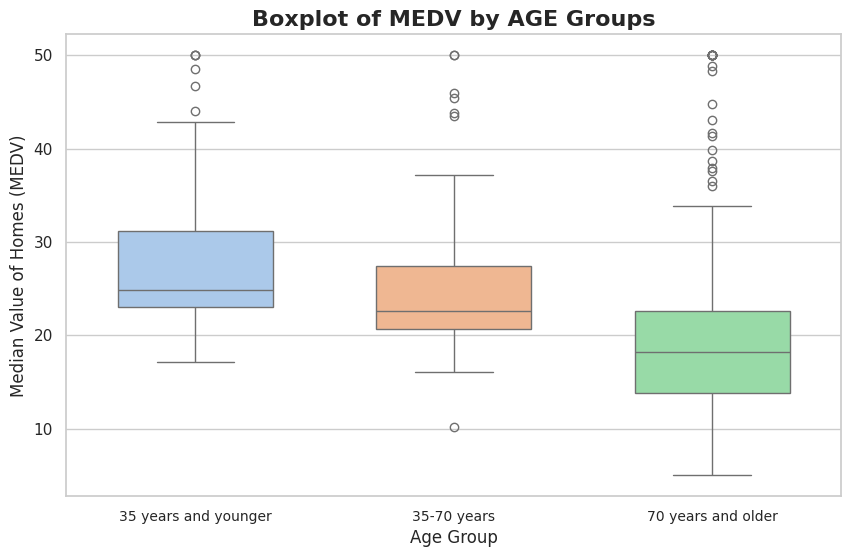

In [15]:
# Discretize AGE into groups
bins = [0, 35, 70, float('inf')]  # Define bins
labels = ['35 years and younger', '35-70 years', '70 years and older']  # Define labels
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Set a theme for aesthetics
sns.set_theme(style="whitegrid")

# Create the boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette="pastel", width=0.6)

# Customize the plot
pyplot.title("Boxplot of MEDV by AGE Groups", fontsize=16, weight='bold')
pyplot.xlabel("Age Group", fontsize=12)
pyplot.ylabel("Median Value of Homes (MEDV)", fontsize=12)
pyplot.xticks(fontsize=10)
pyplot.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



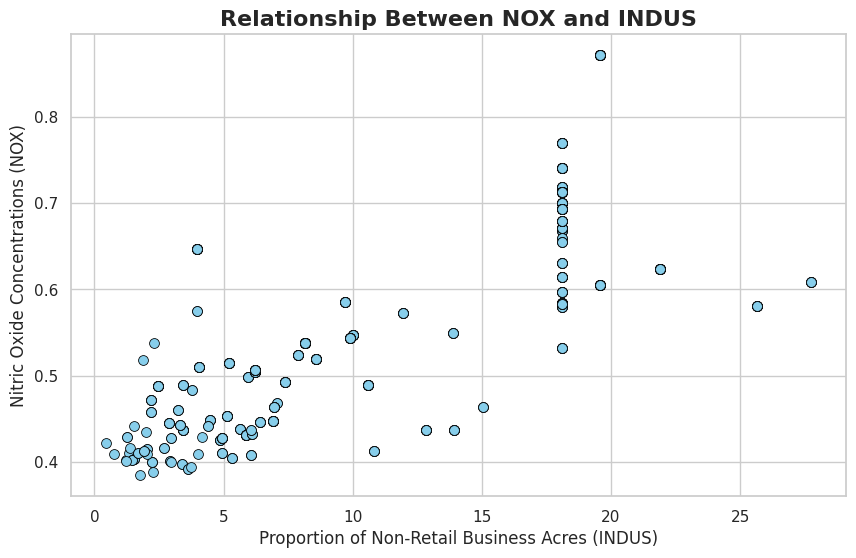

In [16]:
# Set a theme for aesthetics
sns.set_theme(style="whitegrid")

# Create the scatter plot
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'], color="skyblue", s=50, edgecolor="black")

# Customize the plot
pyplot.title("Relationship Between NOX and INDUS", fontsize=16, weight='bold')
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)", fontsize=12)
pyplot.ylabel("Nitric Oxide Concentrations (NOX)", fontsize=12)
pyplot.grid(True)
pyplot.show()

After seeing the scaterplot it seems that we have a slight correlation between the two variables.

Create a histogram for the pupil to teacher ratio variable

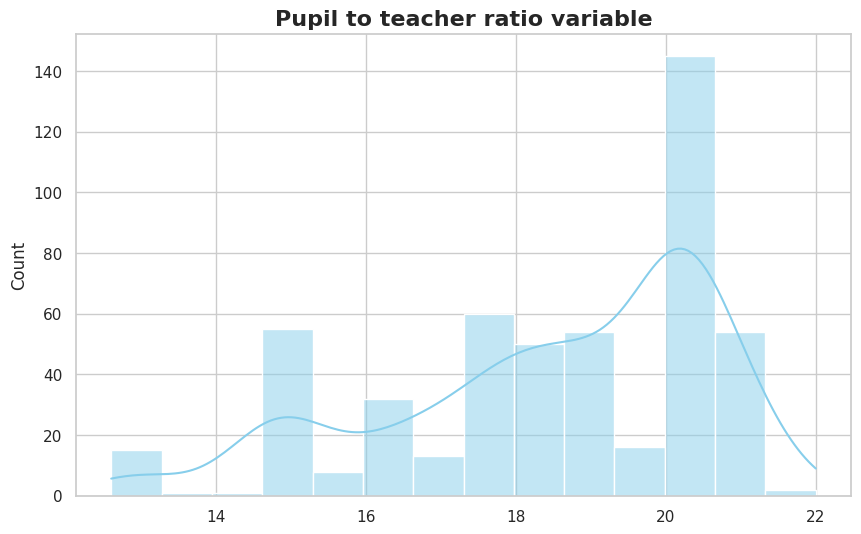

In [21]:
# Set a theme for aesthetics
sns.set_theme(style="whitegrid")

# Create the scatter plot
pyplot.figure(figsize=(10, 6))
sns.histplot(x=boston_df['PTRATIO'], color="skyblue", kde = True)

# Customize the plot
pyplot.title("Pupil to teacher ratio variable", fontsize=16, weight='bold')
pyplot.xlabel("", fontsize=12)
pyplot.ylabel("Count", fontsize=12)
pyplot.grid(True)
pyplot.show()

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
### Null Hypothesis (H₀):
* There is no significant difference in the median value of houses (MEDV) between those bounded by the Charles River and those not bounded by the Charles River.
### Alternative Hypothesis (H₁):
* There is a significant difference in the median value of houses (MEDV) between those bounded by the Charles River and those not bounded by the Charles River.

In [24]:
# Split the data into two groups based on CHAS (1: bounded by Charles River, 0: not bounded)
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by the river
group_2 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded by the river

# Perform an independent T-test
t_stat, p_value = stats.ttest_ind(group_1, group_2)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference in the median value of houses.")
else:
    print("There is no significant difference in the median value of houses.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median value of houses.


## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Null Hypothesis (H₀):
* There is no significant difference in the mean (or median) values of houses (MEDV) for different levels of the AGE variable (proportion of owner-occupied units built prior to 1940).
### Alternative Hypothesis (H₁):
*  There is a significant difference in the mean (or median) values of houses (MEDV) across different groups of the AGE variable.

In [38]:
# Discretize AGE into groups
bins = [0, 35, 70, float('inf')]  # Define bins
labels = ['35 years and younger', '35-70 years', '70 years and older']  # Define labels
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

lm = ols('MEDV ~ AGE_Group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
AGE_Group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


Based on the P-Value we can conlcude that there is a significant difference in the mean (or median) values of houses (MEDV) across different groups of the AGE variable.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Null Hypothesis (H₀):
* There is no linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
### Alternative Hypothesis (H₁):
* There is a linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [35]:
# Extract the relevant columns
nox = boston_df['NOX']  # Nitric oxide concentrations
indus = boston_df['INDUS']  # Proportion of non-retail business acres per town

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(nox, indus)

# Print the results
print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant linear relationship between NOX and INDUS.")
else:
    print("There is no significant linear relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant linear relationship between NOX and INDUS.


## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [37]:
# Extract the relevant columns
X = boston_df['DIS']  # Weighted distance to the five Boston employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant to the independent variable (for the intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        20:46:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For each additional unit increase in the weighted distance to the employment centers, the median value of homes (MEDV) is expected to increase by 1.0916 units.